<a href="https://colab.research.google.com/github/JoYongJIn/YongJin-Repository/blob/main/Gaussian_Mixture_Model_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/insurance.csv",sep = ",")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
print(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


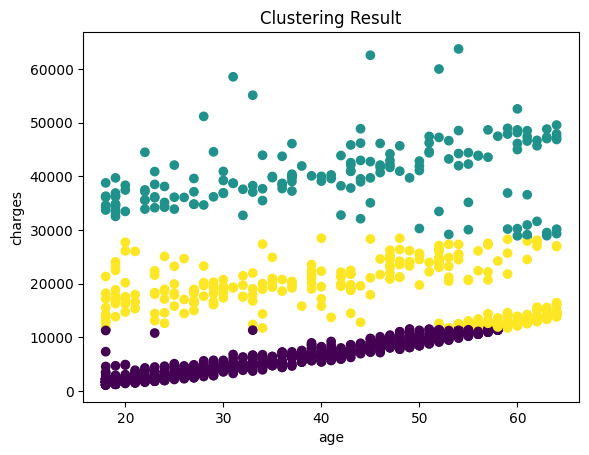

In [ ]:
from sklearn.cluster import KMeans

# 두 가지 feature 선택
X = df[['age', 'charges']]

# 군집화 모델 생성 및 학습
n_clusters = 3  # 군집의 개수 설정
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

# 군집화 결과 예측
labels = kmeans.labels_

# 군집화 결과 그래프로 그리기
plt.scatter(X['age'], X['charges'], c=labels)
plt.xlabel('age')
plt.ylabel('charges')
plt.title('Clustering Result')
plt.show()

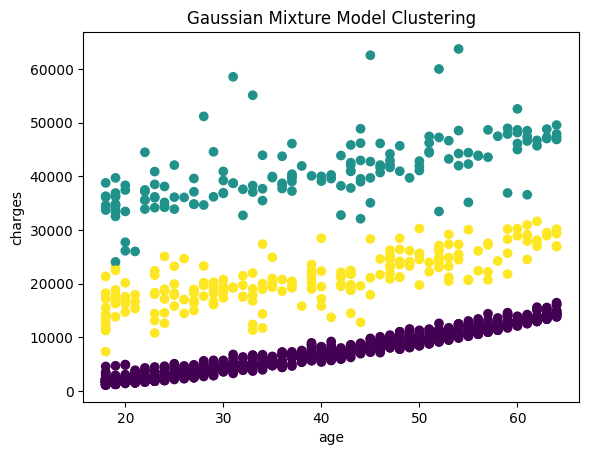

In [ ]:
from sklearn.mixture import GaussianMixture

# 가우시안 혼합 모델 생성
gmm = GaussianMixture(n_components=3, covariance_type='full')

# 데이터에 모델 피팅
gmm.fit(X)

# 군집 예측
labels = gmm.predict(X)

# 군집 결과 시각화
plt.scatter(X['age'], X['charges'], c=labels, cmap='viridis')
plt.xlabel('age')
plt.ylabel('charges')
plt.title('Gaussian Mixture Model Clustering')
plt.show()
#결과를 보면 서로다른 종류의 군집을 세개로 나눌수있다는 것을 알려주고있다 잘 모르던 데이터를 세개의 군집으로
#나눌수있다는것을 알려주는것이 의의 이다

In [ ]:
# 가우시안 혼합 모델에서 샘플 생성
num_samples = 5  # 생성할 샘플 개수

# 각 가우시안 분포에서 샘플 생성(컴포넌트는 구성요소, 요소 라는 뜻이다.)
samples = []
for component in range(gmm.n_components):
    component_samples = gmm.sample(num_samples)
    samples.append(component_samples)

# 생성된 샘플 출력
for i, component_samples in enumerate(samples):
    print(f"Component {i+1} samples:")
    print(component_samples)
    print()

#세개의 군집 각각에대하여 샘플 5개씩생성


Component 1 samples:
(array([[   38.27309347,  6895.29143694],
       [   39.15378109,  7993.17205948],
       [   39.08575529,  6418.88744647],
       [   48.92181344,  8618.3294512 ],
       [   53.24957014, 10950.27716763]]), array([0, 0, 0, 0, 0]))

Component 2 samples:
(array([[4.19506176e+01, 7.56516282e+03],
       [2.88191064e+01, 4.26174628e+03],
       [5.92708778e+01, 4.03008547e+04],
       [6.20408337e+01, 5.61726959e+04],
       [4.33527668e+01, 2.96769902e+04]]), array([0, 0, 1, 1, 2]))

Component 3 samples:
(array([[   30.78585883,  5426.86957662],
       [   65.46675312, 14034.01878479],
       [   50.33020683,  9447.01695934],
       [   48.5227185 ,  9911.93931691],
       [   17.86547203, 13444.10118664]]), array([0, 0, 0, 0, 2]))



In [ ]:
from sklearn.mixture import GaussianMixture

# 두 가지 feature 선택
X = df[['age', 'charges']]

# 가우시안 혼합 모델 생성
gmm = GaussianMixture(n_components=3, covariance_type='full')

# 데이터에 모델 피팅
gmm.fit(X)

# 가우시안 혼합 모델에서 샘플 생성
num_samples = 5  # 생성할 샘플 개수

# 각 가우시안 분포에서 샘플 생성
samples = []
for component in range(gmm.n_components):
    component_samples = gmm.sample(num_samples)[0]  # 첫 번째 반환값인 생성된 샘플만 사용
    samples.append(component_samples)

# 생성된 샘플 출력
for i, component_samples in enumerate(samples):
    print(f"Component {i+1} samples:")
    print(component_samples)
    print()


Component 1 samples:
[[  26.72918739 4675.36807931]
 [  46.18711559 8482.80062207]
 [  30.17780067 4865.66390081]
 [  31.53194533 5317.06065813]
 [  43.95898201 6803.26190916]]

Component 2 samples:
[[1.69293882e+01 8.64722415e+02]
 [4.54568969e+01 1.00145925e+04]
 [3.37917465e+01 4.48624498e+03]
 [4.76651473e+01 9.87428088e+03]
 [3.77452815e+01 1.87435748e+04]]

Component 3 samples:
[[ 7.72235525e+00 -2.94588191e+03]
 [ 4.23288228e+01  7.44161211e+03]
 [ 3.88261711e+01  4.90210146e+04]
 [ 1.18621854e+01  3.56485743e+04]
 [ 4.70841863e+01  2.49851140e+04]]



In [ ]:
#만들어진 가우시안믹스쳐모델의 성능을 보기위해 생성된 5개의 샘플중 2%이하의 이상치를 탐지해본다.

import numpy as np
from scipy.spatial.distance import cdist
from scipy.stats import chi2

# 가우시안 혼합 모델에서 각 샘플에 대한 Mahalanobis 거리 계산
distances = []
for i in range(gmm.n_components):
    # 각 샘플과 해당 가우시안 분포의 평균 사이의 Mahalanobis 거리 계산
    component_distances = cdist(samples[i], gmm.means_[i].reshape(1, -1), 'mahalanobis', VI=np.linalg.pinv(gmm.covariances_[i]))
    distances.append(component_distances)

# 전체 샘플의 Mahalanobis 거리 합산
distances = np.concatenate(distances)

# chi-square 분포의 98번째 백분위수에 해당하는 거리를 찾아 이상치 임계값 설정
threshold = chi2.ppf((1-0.02), df=2)

# 이상치 탐지
outliers = distances > threshold

# 이상치 출력
print(f"Outlier indices:")
print(np.where(outliers)[0])

Outlier indices:
[12]
